In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [329]:
#importando datos de fallas
dff=df = pd.read_excel('EPM_datos_Uraba\Original_Data\Reporte Uraba2019_CAGMV1Est.xlsx', sheet_name='BD-Filtrada')
dff["town"]=dff["town"].str.upper()

In [688]:
dff.columns

Index(['CallID', 'NumberOT', 'TaskNumber', 'Status', 'ServiceType', 'id',
       'Eng_Type', 'RepairDate', 'FinalRepairDate', 'DuratioMin', 'TaskType',
       'CompletionDate', 'OpenDate', 'EarlyStart', 'DueDate', 'DispatchDate',
       'TravelDate', 'OnSiteDate', 'Region', 'District', 'TreeServiceGroup',
       'ServiceGroup', 'BusinessLine', 'town', 'Latitude', 'Longitude',
       'Priority', 'IncompleteReason', 'CrewGeneralComments', 'RepairCode',
       'W6Key', 'IdEPM', 'LocationID', 'LocationDescription', 'Circuit'],
      dtype='object')

In [690]:
dff.head()

,CallID,NumberOT,TaskNumber,Status,ServiceType,id,Eng_Type,RepairDate,FinalRepairDate,DuratioMin,...,Longitude,Priority,IncompleteReason,CrewGeneralComments,RepairCode,W6Key,IdEPM,LocationID,LocationDescription,Circuit
0,M_EPM_EN_3974557,3294596,1,Realizada,Daños Energía,E_D0239,CU-TyD-Moto_MttoDaños_X1,2019-12-31 19:24:00,2019-12-31 19:30:00,30,...,-76809294,1,NaN,Se realizo reposición de fusible en el fr 4159...,CAMBIAR O INSTALAR FUSIBLE AISLADERO RAMAL - R...,1527996425,1460157,FR4159,Aisladero,405-13
1,M_EPM_EN_3974642,3294347,1,Realizada,Daños Energía,E_D0264,CU-TyD-Moto_MttoDaños_X1,2019-12-31 17:59:00,2019-12-31 18:23:00,30,...,-76732551,4,NaN,Se llega a el cirio y se encuentra que el daño...,REVISIÓN POR CALIDAD DEL SERVICIO,1527808009,1459416,402-11,Salida Circuito,402-11
2,M_EPM_EN_3974707,3294568,2,Realizada,Daños Energía,E_D0223,CU-TyD-Moto_MttoDaños_X1,2019-12-31 17:57:00,2019-12-31 17:59:00,30,...,-76598210,4,NaN,Se realizó inspección encontrándose poste a pu...,CAMBIAR/ASEGURAR POSTE PRIMARIO - Ramales,1527955467,1460101,489023,Transformador,415-12
3,MX_EPM_0133_DE_2037523,2037523,1,Realizada,Mto. Ener. Actividades Forestales,E_MP219,CU-TyD-Moto_Poda_X2,NaT,NaT,600,...,-76646490,7,NaN,corregimiento pueblo nuevo \nvereda comarca ...,NaN,1517256747,1419179,R1269,CIRCUITO 415-12 SEGMENTO R1269,NaN
4,M_EPM_EN_3974852,3294520,1,Realizada,Daños Energía,E_D0270,CU-TyD-Moto_MttoDaños_X1,2019-12-31 16:52:00,2019-12-31 17:07:00,30,...,-76304074,1,NaN,Se repuso 1 fusible de 6T al F47910 el servici...,CAMBIAR O INSTALAR FUSIBLE AISLADERO RAMAL - R...,1527922700,1460058,478088,Transformador,407-12


In [330]:
#importando datos de clima

precip_path="EPM_datos_Uraba/weather data/precipitacion/"
dfw_precip = pd.DataFrame()
for file_name in glob.glob(precip_path+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    dfw_precip = pd.concat([dfw_precip,x],axis=0)
    
hum_path="EPM_datos_Uraba/weather data/hum/"
dfw_hum = pd.DataFrame()
for file_name in glob.glob(hum_path+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    dfw_hum = pd.concat([dfw_hum,x],axis=0)
    
#hum_path="EPM_datos_Uraba\weather data\hum\""
#dfw_precip = pd.DataFrame()
#for file_name in glob.glob(hum_path+'*.csv'):
#    x = pd.read_csv(file_name, low_memory=False)
#    glued_data = pd.concat([glued_data,x],axis=0)
dfw_precip["Municipio"]=dfw_precip["Municipio"].str.upper()
dfw_hum["Municipio"]=dfw_hum["Municipio"].str.upper()

In [331]:
#importando los datos de infraestructura

#transformadores

dfi_t=df = pd.read_csv('EPM_datos_Uraba\Original_Data\TRANSFO_PT.csv')

In [332]:
#importando divipola

divipola= pd.read_excel('EPM_datos_Uraba\municipios\Listados_DIVIPOLA.xlsx', sheet_name='municipio')
divipola= divipola[divipola["Nombre_depto"].isin(["ANTIOQUIA","CHOCÓ"])]
divipola["Nombre_depto"].unique()

array(['ANTIOQUIA', 'CHOCÓ'], dtype=object)

In [6]:
#itenditificando las variables que identifican el municipio
#dff.town #nombre minúscula
#dfw_precip.Municipio #nombre
#dfi_t.MUNICIPIO_ #código 4 dígitos
#divipola.Nombre_municipio # nombre mayúscula
#divipola.Código_municipio # código 4 dígitos

In [333]:
#incluyendo el nombre del municipio en la base de insfraestructura

dfi_tm=dfi_t.merge(divipola[["Código_municipio","Nombre_municipio", "Nombre_depto", "Código_depto "]], left_on="MUNICIPIO_", right_on="Código_municipio", how="left")

In [334]:
#incluyendo el código del municipio en la base de fallas
dff_m=dff.merge(divipola[["Código_municipio","Nombre_municipio", "Nombre_depto", "Código_depto "]], left_on="town", right_on="Nombre_municipio" , how="left")



In [335]:
#incluyendo el código del municipio en las bases de precipitacion y humedad

dfw_precip=dfw_precip.merge(divipola[["Código_municipio","Nombre_municipio", "Nombre_depto", "Código_depto "]], left_on="Municipio", right_on="Nombre_municipio", how="left")
dfw_hum=dfw_hum.merge(divipola[["Código_municipio","Nombre_municipio", "Nombre_depto", "Código_depto "]], left_on="Municipio", right_on="Nombre_municipio", how="left")

In [336]:
print(len(dfi_tm))
print(len(dff_m))
print(len(dff))
#hay algunos datos qde fallas que no podemos cruzar porque no está el municipio

13503
49494
49494


In [337]:
dff_m.Nombre_depto.unique()

array(['ANTIOQUIA', nan, 'CHOCÓ'], dtype=object)

In [338]:
dfi_tm.Nombre_depto.unique()

array(['ANTIOQUIA', 'CHOCÓ'], dtype=object)

In [339]:
dfw_precip.Nombre_depto.unique()

array(['ANTIOQUIA', nan, 'CHOCÓ'], dtype=object)

In [340]:
dfw_hum.Nombre_depto.unique()

array(['ANTIOQUIA', nan, 'CHOCÓ'], dtype=object)

In [341]:
#adding a dummy variable indicating if there was a failure
dff_m["fail"]=1

In [718]:
#fails_circuit_by_day_loca=pd.DataFrame(pd.unique(dff_m[["NumberOT","Circuit","OpenDate","fail"]].values.ravel()))
#fails_circuit_by_day_loca.head()

distinct_df = dff_m[ ["NumberOT","Circuit","OpenDate","Nombre_municipio","District", "ServiceType","fail"] ].groupby(["NumberOT","Circuit","OpenDate","fail", "Nombre_municipio", "District", "ServiceType"]).first().reset_index()
distinct_df.head()
print(len(distinct_df))


30644


In [719]:
print(distinct_df.shape)
print(dff_m.shape)

(30644, 7)
(49494, 40)


In [720]:
#creating false failures to complement no failures

#list of unique cicuits
#circuits_f=pd.DataFrame(pd.unique(dff_m["Circuit"]))
#print(circuits_f.shape)


circuits_i=pd.DataFrame(pd.unique(dfi_tm["CIRCUITO"]))
print(circuits_i.shape)


(70, 1)


In [721]:
#Probando regresión Poisson
from patsy import dmatrices
import statsmodels.api as sm

In [722]:
pd.to_datetime(distinct_df['OpenDate'], format='%Y-%m-%d %H %M %S')
distinct_df['Date']=distinct_df['OpenDate'].dt.date
distinct_df['day']=distinct_df['OpenDate'].dt.day
distinct_df['Month']=distinct_df['OpenDate'].dt.month
distinct_df['year']=distinct_df['OpenDate'].dt.year
distinct_df.columns
distinct_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30644 entries, 0 to 30643
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NumberOT          30644 non-null  int64         
 1   Circuit           30644 non-null  object        
 2   OpenDate          30644 non-null  datetime64[ns]
 3   fail              30644 non-null  int64         
 4   Nombre_municipio  30644 non-null  object        
 5   District          30644 non-null  object        
 6   ServiceType       30644 non-null  object        
 7   Date              30644 non-null  object        
 8   day               30644 non-null  int64         
 9   Month             30644 non-null  int64         
 10  year              30644 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 2.6+ MB


In [723]:
dfw_hum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 0 to 1052
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CodigoEstacion    1053 non-null   int64         
 1   NombreEstacion    1053 non-null   object        
 2   Latitud           1053 non-null   float64       
 3   Longitud          1053 non-null   float64       
 4   Altitud           1053 non-null   int64         
 5   Categoria         1053 non-null   object        
 6   Entidad           1053 non-null   object        
 7   AreaOperativa     1053 non-null   object        
 8   Departamento      1053 non-null   object        
 9   Municipio         1053 non-null   object        
 10  FechaInstalacion  1053 non-null   object        
 11  FechaSuspension   0 non-null      float64       
 12  IdParametro       1053 non-null   object        
 13  Etiqueta          1053 non-null   object        
 14  DescripcionSerie  1053 n

In [724]:
#merging with weather data

#distinct_df.merge(dfw_hum[["","",""]])

#pd.to_datetime(dfw_hum['Fecha'], format='%Y-%m-%d %H:%M')
dfw_hum['Fecha']=dfw_hum['Fecha'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M')
dfw_hum['Date']=dfw_hum['Fecha'].dt.date
#dfw_hum['day']=dfw_hum['Fecha'].dt.day
#dfw_hum['Month']=dfw_hum['Fecha'].dt.month

dfw_hum['Fecha']=dfw_hum['Fecha'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M')
dfw_hum['Date']=dfw_hum['Fecha'].dt.date

dfw_precip['Fecha']=dfw_precip['Fecha'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M')
dfw_precip['Date']=dfw_precip['Fecha'].dt.date


#####merging by date and municipio

d=distinct_df.merge(dfw_hum[["Date", "Nombre_municipio", "Valor"]], on=["Date","Nombre_municipio"], how='left')
d.rename(columns={'Valor': 'humedad_rel'}, inplace=True)
d=d.merge(dfw_precip[["Date", "Nombre_municipio", "Valor"]], on=["Date","Nombre_municipio"], how='left')
d.rename(columns={'Valor': 'precipitacion'}, inplace=True)
distinct_dff=d
distinct_dff.head()

,NumberOT,Circuit,OpenDate,fail,Nombre_municipio,District,ServiceType,Date,day,Month,year,humedad_rel,precipitacion
0,2831866,412-14,2018-08-30 17:32:28,1,CAREPA,Apartado TyD,Mantenimiento Energía,2018-08-30,30,8,2018,NaN,NaN
1,2929866,406-11,2018-12-07 09:48:58,1,TURBO,Turbo TyD,Mantenimiento Energía,2018-12-07,7,12,2018,NaN,NaN
2,2934398,415-11,2018-12-13 07:37:00,1,NECOCLÍ,Turbo TyD,Mantenimiento Energía,2018-12-13,13,12,2018,NaN,NaN
3,2945255,407-12,2018-12-28 09:27:36,1,SAN PEDRO DE URABÁ,Turbo TyD,Mantenimiento Energía,2018-12-28,28,12,2018,NaN,NaN
4,2945565,415-13,2018-12-28 16:30:01,1,NECOCLÍ,Turbo TyD,Mantenimiento Energía,2018-12-28,28,12,2018,NaN,NaN


In [725]:
print(len(distinct_dff))

30664


In [854]:
distinct_dff=distinct_dff[(distinct_dff["year"]>2018)&(~distinct_dff["ServiceType"].str.contains("Mantenimiento Subterránea"))]

In [856]:
a=distinct_dff[distinct_dff["precipitacion"].isnull()]
print(30643 - len(a))
c=distinct_dff[distinct_dff["humedad_rel"].isnull()]
print(30643 - len(c))

10306
41


In [858]:
print(len(distinct_df1))

14128


In [859]:
len(distinct_df1["Circuit"].unique())

62

In [962]:
distinct_df1=distinct_dff[["NumberOT", "Circuit", "Nombre_municipio", "day", "Month", "District", "ServiceType"]].groupby([ "Circuit", "Nombre_municipio", "day", "Month","District", "ServiceType"]).count().reset_index()
distinct_df1.dropna()

mask = np.random.rand(len(distinct_df1)) < 0.8
df_train = distinct_df1[mask]
df_test = distinct_df1[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

expr = """NumberOT ~ ServiceType + District"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

xtr=list(X_train.columns)
xt=list(X_test.columns)

def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans
main_list = setdiff_sorted(xtr,xt)
print(main_list)
main_list_c = setdiff_sorted(xt,xtr)
print(main_list_c)

Training data set length=11263
Testing data set length=2865
[]
[]


In [963]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               NumberOT   No. Observations:                11263
Model:                            GLM   Df Residuals:                    11260
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21066.
Date:                Sat, 11 Jul 2020   Deviance:                       14246.
Time:                        20:48:23   Pearson chi2:                 2.49e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [964]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)
############revisar los datos para eliminar los NaN y eliminarlos.

           mean   mean_se  mean_ci_lower  mean_ci_upper
1      2.345892  0.021545       2.304043       2.388502
7      1.987304  0.021136       1.946307       2.029166
10     1.987304  0.021136       1.946307       2.029166
15     1.890260  0.030449       1.831513       1.950892
17     1.987304  0.021136       1.946307       2.029166
...         ...       ...            ...            ...
14105  2.345892  0.021545       2.304043       2.388502
14108  2.231337  0.030463       2.172423       2.291849
14119  2.345892  0.021545       2.304043       2.388502
14120  2.345892  0.021545       2.304043       2.388502
14123  2.345892  0.021545       2.304043       2.388502

[2865 rows x 4 columns]


In [887]:
poisson_predictions

In [903]:
distinct_df1=distinct_dff[["NumberOT", "Circuit", "Nombre_municipio", "day", "Month", "District", "ServiceType","precipitacion"]].groupby([ "Circuit", "Nombre_municipio", "day", "Month","District", "ServiceType", "precipitacion"]).count().reset_index()

distinct_df1.dropna()

mask = np.random.rand(len(distinct_df1)) < 0.8
df_train_w = distinct_df1[mask]
df_test_w = distinct_df1[~mask]
print('Training data set length='+str(len(df_train_w)))
print('Testing data set length='+str(len(df_test_w)))

expr = """NumberOT ~ ServiceType + District + precipitacion """

y_train_w, X_train_w = dmatrices(expr, df_train_w, return_type='dataframe')
y_test_w, X_test_w = dmatrices(expr, df_test_w, return_type='dataframe')

xtr_w=list(X_train_w.columns)
xt_w=list(X_test_w.columns)

def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans
main_list = setdiff_sorted(xtr_w,xt_w)
print(main_list)
main_list_c = setdiff_sorted(xt_w,xtr_w)
print(main_list_c)

Training data set length=3797
Testing data set length=1031
[]
[]


In [932]:
print(round(distinct_df1["NumberOT"].mean(),2))
round(distinct_df1["NumberOT"].var(),2)

2.13


3.74

In [904]:
poisson_training_results_w = sm.GLM(y_train_w, X_train_w, family=sm.families.Poisson()).fit()
print(poisson_training_results_w.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               NumberOT   No. Observations:                 3797
Model:                            GLM   Df Residuals:                     3793
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6915.3
Date:                Sat, 11 Jul 2020   Deviance:                       4394.9
Time:                        19:17:00   Pearson chi2:                 6.95e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [905]:
poisson_predictions_w = poisson_training_results_w.get_prediction(X_test_w)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame_w = poisson_predictions_w.summary_frame()
print(predictions_summary_frame_w)
############revisar los datos para eliminar los NaN y eliminarlos.

          mean   mean_se  mean_ci_lower  mean_ci_upper
2     1.993980  0.041987       1.913362       2.077996
8     1.740186  0.051832       1.641505       1.844799
13    1.740186  0.051832       1.641505       1.844799
14    1.740186  0.051832       1.641505       1.844799
17    1.740186  0.051832       1.641505       1.844799
...        ...       ...            ...            ...
4813  2.020880  0.047545       1.929809       2.116250
4815  2.007466  0.047470       1.916550       2.102694
4819  2.293288  0.035617       2.224532       2.364169
4822  2.293288  0.035617       2.224532       2.364169
4826  2.175807  0.060291       2.060791       2.297242

[1031 rows x 4 columns]


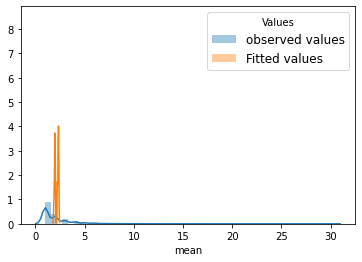

In [967]:
fig_dims = (20, 16)
fig, ax = plt.subplots()
sns.distplot(y_test, label="observed values")
sns.distplot(predictions_summary_frame["mean"],label="Fitted values")
plt.legend(prop={'size': 12}, title = 'Values')







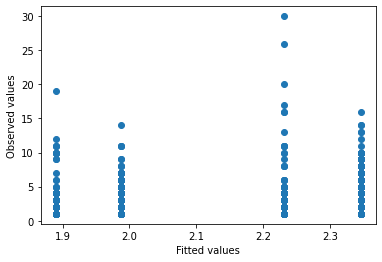

In [965]:
y = y_test
yhat=predictions_summary_frame["mean"]

fig_dims = (20, 16)
fig, ax = plt.subplots()
ax.scatter(yhat, y)
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');




In [961]:
y = y_test
#y
predictions_summary_frame["mean"].shape


(1001,)

In [968]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(poisson_training_results.summary().as_latex())
f.write(endtex)
f.close()